Context:


The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.


In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
iris=pd.read_csv('D:\Internship\OIBSIP\Task-1\Iris.csv')

In [54]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


FOR EDA & VISUALISATION, CHECK "IRIS VISUALIZATION" NOTEBOOK.

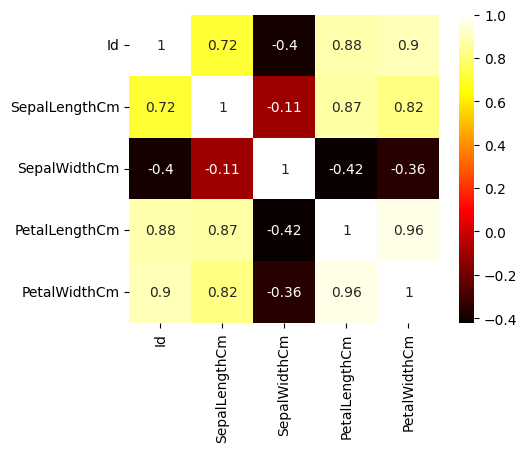

In [56]:
corr=iris.corr(numeric_only = True)
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='hot')
plt.show()

MACHINE LEARNING

USING DIFFERENT ML ALGOS TO CHECK WHICH SUITS BEST FOR THIS DATASET CLASSIFICATION

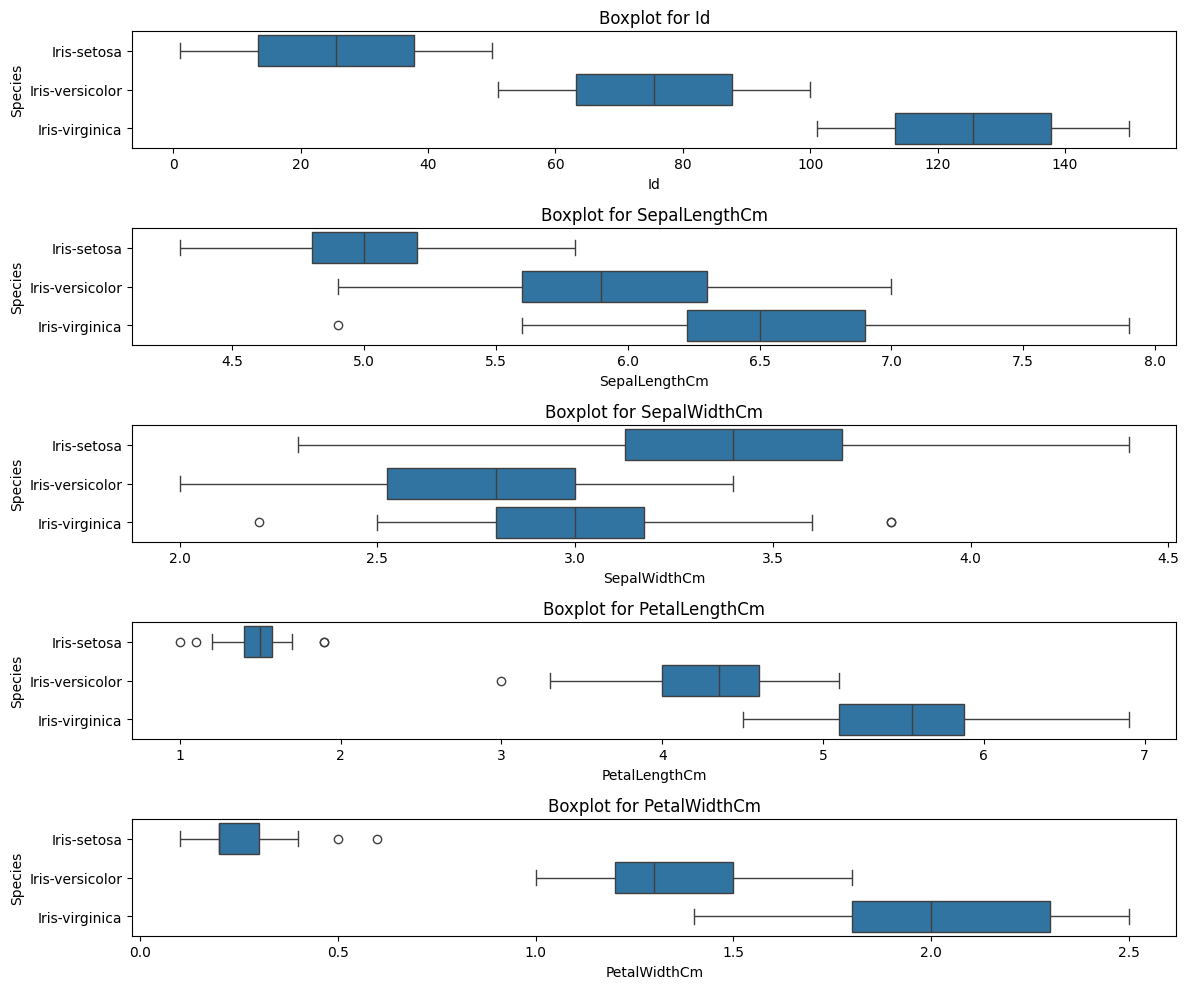

In [57]:
#checking outliers

numerical_data = [col for col in iris.columns if iris.dtypes[col]!='object']
plt.figure(figsize=(12, 10))
for i in range(len(numerical_data)):
    plt.subplot(len(numerical_data),1, i + 1)  
    sns.boxplot(x=numerical_data[i], y='Species', data=iris)
    plt.title(f'Boxplot for {numerical_data[i]}')
plt.tight_layout()  
plt.show()

In [ ]:
#LABEL ENCODING

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
x=iris.drop('Species', axis=1)
y=iris['Species']

In [ ]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X=iris.drop('Species', axis=1)

Y=iris['Species']

y = pd.Categorical(y).codes

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model=LogisticRegression(max_iter=1000, C=0.1, penalty='l2')
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9583333333333334
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.90      0.93        39
           2       0.90      0.97      0.94        38

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

Confusion Matrix:
[[43  0  0]
 [ 0 35  4]
 [ 0  1 37]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier()

In [ ]:
model.fit(x_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9583333333333334
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.90      0.93        39
           2       0.90      0.97      0.94        38

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

Confusion Matrix:
[[43  0  0]
 [ 0 35  4]
 [ 0  1 37]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for KNN
knn_grid = {'n_neighbors': [3, 5, 10, 15, 20]}

# Define the hyperparameter grid for Logistic Regression
lr_grid = {'C': [0.1, 1, 10, 100]}

# Perform grid search for KNN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=5)
knn_grid_search.fit(x_train_scaled, y_train)

# Perform grid search for Logistic Regression
lr_grid_search = GridSearchCV(LogisticRegression(), lr_grid, cv=5)
lr_grid_search.fit(x_train_scaled, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("KNN Best Hyperparameters:", knn_grid_search.best_params_)
print("KNN Best Accuracy:", knn_grid_search.best_score_)

print("Logistic Regression Best Hyperparameters:", lr_grid_search.best_params_)
print("Logistic Regression Best Accuracy:", lr_grid_search.best_score_)

KNN Best Hyperparameters: {'n_neighbors': 3}
KNN Best Accuracy: 0.9666666666666666
Logistic Regression Best Hyperparameters: {'C': 1}
Logistic Regression Best Accuracy: 0.9333333333333333


In [ ]:
from sklearn.tree import DecisionTreeClassifier


model=DecisionTreeClassifier()

model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(x_test_scaled)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy:  31.666666666666664
Accuracy: 0.9916666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        39
           2       1.00      0.97      0.99        38

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Confusion Matrix:
[[43  0  0]
 [ 0 39  0]
 [ 0  1 37]]


C:\Users\psing\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Define the hyperparameter grid for Decision Tree Classifier
dt_grid = {'max_depth': [3, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10]}

# Perform grid search for Decision Tree Classifier
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_grid, cv=5)
dt_grid_search.fit(x_train_scaled, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Decision Tree Classifier Best Hyperparameters:", dt_grid_search.best_params_)
print("Decision Tree Classifier Best Accuracy:", dt_grid_search.best_score_)

Decision Tree Classifier Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Decision Tree Classifier Best Accuracy: 0.9
